In [53]:
# Definir las credentiales para acceder a Kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

#CREDENTIALS
api_token = {"username":"lanreaves","key":"77a10244e730ea07039f98ac7807ed1e"}

import json

# Crear un archivo con las credenciales para que Kaggle pueda acceder fácilmente a él.
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

/usr/bin/zsh: /home/lan/miniconda3/envs/course_av_proj/lib/python3.10/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
/usr/bin/zsh: /home/lan/miniconda3/envs/course_av_proj/lib/python3.10/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)


PermissionError: [Errno 13] Permission denied: '/root/.kaggle/kaggle.json'

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Specify the dataset you want to download
dataset_name = 'lanreaves/electronic-products'

# Download the dataset
api.dataset_download_files(dataset_name, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/lanreaves/electronic-products


In [ ]:
!ls -1  /content/final_dataset_reduced/images_final_reduced | wc -l

46680


In [ ]:
import pandas as pd
preDF = pd.read_csv("prod_data_images_v3.csv")
n = int(preDF.shape[0]*0.5)
print(n)
df = preDF.sample(n = n, random_state=40)

23340


In [ ]:
df.describe()

,type_id,category_id
count,23340.000000,23340.000000
mean,27.530934,3.426907
std,22.499787,2.322219
min,0.000000,0.000000
25%,7.000000,1.000000
50%,21.000000,4.000000
75%,54.000000,5.000000
max,61.000000,7.000000


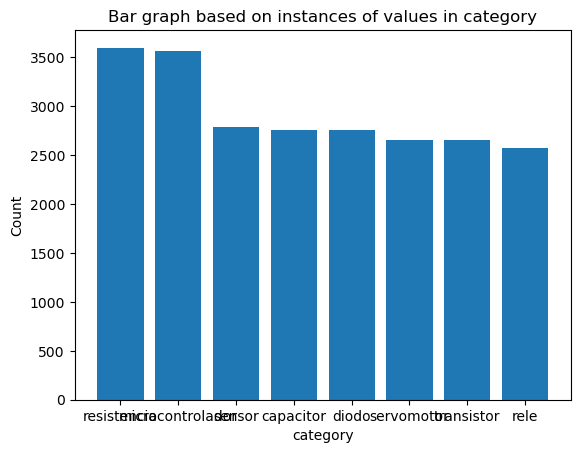

In [ ]:
import matplotlib.pyplot as plt
value_cou = df['category'].value_counts()
plt.bar(value_cou.index, value_cou.values)
plt.xlabel("category")
plt.ylabel('Count')
plt.title(f'Bar graph based on instances of values in category')
plt.show()

In [ ]:
_ , mapReplacement = pd.factorize(df['category'])

mapReplacement

Index(['microcontrolador', 'resistencia', 'rele', 'transistor', 'diodo',
       'sensor', 'capacitor', 'servomotor'],
      dtype='object')

In [ ]:
import cv2
import numpy as np
totalImages = []
for index, row in df.iterrows():
    uuid = row["UUID"]
    routeImage =  f"../images_final_reduced_100/{uuid}.jpg"
    image = cv2.imread(routeImage)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    totalImages.append(image_rgb)

imagesLoaded = np.array(totalImages)
categories = df['category_id'].to_numpy()



In [ ]:
from sklearn.model_selection import train_test_split
X_train_sub, X_test , y_train_sub, y_test = train_test_split(
    imagesLoaded, categories, test_size=0.10, random_state=42)
X_train, X_test_val, y_train, y_test_val = train_test_split(
    X_train_sub, y_train_sub, test_size=0.20, random_state=42)

In [ ]:
X_train, X_test_val, X_test = X_train / 255.0, X_test_val / 255.0, X_test / 255.0

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

img_height, img_width, img_channels = 100, 100, 3
num_classes = 8




In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, img_channels)))
model.add(MaxPooling2D((2, 2)))
#second
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#third
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#4
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
#5
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

#output
model.add(Dense(num_classes, activation='softmax'))


model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()




2024-06-02 20:54:37.787324: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [ ]:
history = model.fit(X_train, y_train , epochs=15,
                    validation_data=(X_test_val , y_test_val),
                    batch_size=64)
#h5 format
model.save("firstTry.h5")

Epoch 1/15
263/263 [==============================] - 274s 1s/step - loss: 0.8663 - accuracy: 0.6338 - val_loss: 0.7833 - val_accuracy: 0.6585
Epoch 2/15
263/263 [==============================] - 243s 923ms/step - loss: 0.8043 - accuracy: 0.6569 - val_loss: 0.7750 - val_accuracy: 0.6704
Epoch 3/15
263/263 [==============================] - 245s 933ms/step - loss: 0.7649 - accuracy: 0.6870 - val_loss: 0.6952 - val_accuracy: 0.7158
Epoch 4/15
263/263 [==============================] - 230s 877ms/step - loss: 0.6962 - accuracy: 0.7117 - val_loss: 0.6848 - val_accuracy: 0.7213
Epoch 5/15
263/263 [==============================] - 189s 718ms/step - loss: 0.6407 - accuracy: 0.7389 - val_loss: 0.6363 - val_accuracy: 0.7373
Epoch 6/15
263/263 [==============================] - 205s 778ms/step - loss: 0.6004 - accuracy: 0.7629 - val_loss: 0.6948 - val_accuracy: 0.7287
Epoch 7/15
263/263 [==============================] - 243s 925ms/step - loss: 0.5835 - accuracy: 0.7767 - val_loss: 0.7076 - va

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

loaded_model = keras.models.load_model('firstTry.h5')

2024-06-04 10:21:22.304558: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 10:21:25.145005: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

73/73 [==============================] - 8s 104ms/step - loss: 0.7497 - accuracy: 0.7952
Test accuracy: 0.7952013611793518


In [ ]:
y_pred = loaded_model.predict(X_test)

73/73 [==============================] - 8s 110ms/step


In [ ]:
np.argmax(y_pred, axis=1)

array([0, 6, 5, ..., 5, 5, 7])

In [ ]:
y_test

array([0, 6, 5, ..., 5, 6, 7])

In [ ]:

y_pred_classes = np.argmax(y_pred, axis=1)

[[371   2   1   0   0   0   1   0]
 [  6 235  24  11   6   0  12   4]
 [  2  27 194  23   0   0   2   1]
 [  4  17  29 212   1   0   3   0]
 [  0  15   0   0 212   5  41  25]
 [  1   9   1   2   7 215  86   9]
 [  0   6   1   1  11  40 200  11]
 [  1   3   3   2  15   0   7 217]]


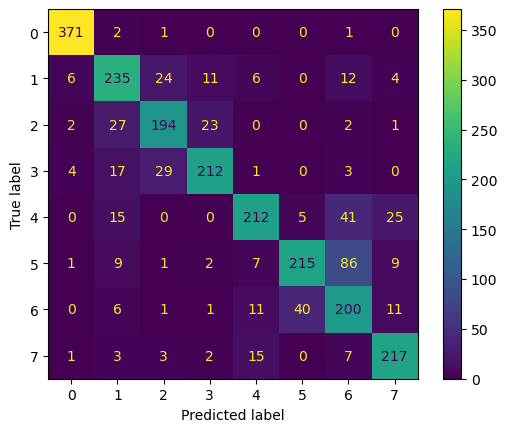

In [ ]:
from sklearn import metrics 
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred_classes)
print(cm)
# Plot the confusion matrix
 
#sns.heatmap(cm, annot=True, fmt='d')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm )

cm_display.plot()
plt.show()
 

In [52]:
labels = ['microcontrolador', 'resistencia', 'rele', 'transistor', 'diodo',
       'sensor', 'capacitor', 'servomotor']

In [ ]:
print(f"Accuracy: {metrics.accuracy_score(y_test,y_pred_classes)}")
print(f"Precision: {metrics.precision_score(y_test,y_pred_classes , average='macro')}")
print(f"Recall: {metrics.recall_score(y_test,y_pred_classes , average='macro')}")
print(f"Specificity: {metrics.recall_score(y_test,y_pred_classes,  average='macro')}")
print(f"F1_score: {metrics.f1_score(y_test,y_pred_classes ,average='macro')}")

Accuracy: 0.7952013710368466
Precision: 0.796571594829595
Recall: 0.7915872715819608
Specificity: 0.7915872715819608
F1_score: 0.7903552474910788
